In [74]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [8]:
X = mnist['data']
y = mnist['target']

In [9]:
X.shape

(70000, 784)

In [10]:
y.shape

(70000,)

In [13]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [17]:
number = X[0].reshape(28,28)

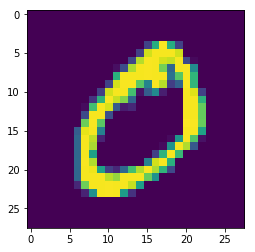

In [18]:
plt.imshow(number)

In [19]:
y[0]

0.0

In [20]:
X_train = X[:60000]
X_test  = X[60000:]
y_train = y[:60000]
y_test  = y[60000:]

In [23]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train = X_train[shuffle_index]
y_train = y_train[shuffle_index]

In [24]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [51]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)

In [75]:
from sklearn.model_selection import StratifiedKFold

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    sgd_clf.fit(X_train_folds, y_train_folds)
    y_pred = sgd_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.82505
0.82715
0.95975


In [76]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95765, 0.96015, 0.95975])

In [79]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[52968,  1611],
       [  838,  4583]])

In [83]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.7399095899257346
0.8454159749123777


In [84]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7891519586741282

In [76]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95765, 0.96015, 0.95975])

In [89]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

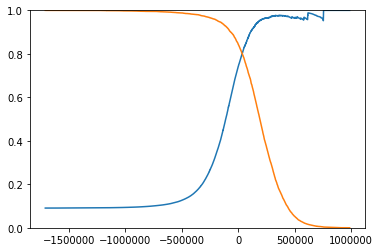

In [90]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
plt.ylim([0,1])
plt.show()